# Lead Score - Case Study

## Problem Statement:
X Education need help them to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Business Goal:
There are quite a few goals for this case study.

1) Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. <br>
2) There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Step 1: Reading and Understanding the Data

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Data Loading

In [2]:
# Read the given CSV file, and view some sample records
ls = pd.read_csv("Leads.csv")
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 1.2 Data Inspection

In [3]:
#checking the total rows and columns in dataframe
ls.shape

(9240, 37)

In [4]:
#checking the dataframe for any NULL values or incorrect datatype
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking the summary of numeric columns
ls.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**`Inferences:`**
- Dataset has 9240 rows and 37 columns.
- There are many NULL values in dataset.
- Datatype of all columns is correct.

## Step 2: Data Cleaning and Preparation

In [6]:
# Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value
# Replacing 'Select' with NaN (Since it means no option is selected)
ls = ls.replace('Select', np.nan)

### 2.1 Missing Data in Columns

In [7]:
# Check the number of missing values in each column
ls.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Checking the percentage of missing values
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Drop the columns from "ls" which have more than 30% of missing values.
for i in ls.columns:
    if (ls[i].isnull().sum()/len(ls[i]))*100>30.0:
        ls.drop([i],axis=1,inplace=True)
        ls1=ls

In [10]:
# dataframe inspection for columns related information
ls1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
#checking the total rows and columns in dataframe
ls1.shape

(9240, 27)

In [12]:
# Check the number of missing values in each column
ls1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

### 2.2 Remove Unique Valued Columns

In [13]:
# Checking if there are columns with one unique value since it won't affect our analysis
ls1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
# Dropping unique valued columns
ls1= ls1.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
              'Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

### 2.3 Remove Unwanted Columns

In [15]:
# Remove columns which are not required for our analysis
unwanted=['Prospect ID', 'Lead Number', 'Country']
ls1.drop(labels=unwanted,axis=1,inplace=True)

In [16]:
# Check the number of missing values in each column
ls1.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
A free copy of Mastering The Interview              0
Last Notable Activity       

In [17]:
# Removing highly skewed columns
skewed = ['Search', 'Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 
          'Newspaper', 'Digital Advertisement', 'Through Recommendations']
ls1.drop(labels=skewed,axis=1,inplace=True)

### 2.4 Mapping Categorical Variables to Integers

In [18]:
# List of variables to map
# Converting some binary variables (Yes/No) to 1/0
varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
ls1[varlist] = ls1[varlist].apply(binary_map)

In [19]:
# Check the number of missing values in each column
ls1.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
What is your current occupation                  2690
What matters most to you in choosing a course    2709
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [20]:
# Imputing the Missing values in 'What is your current occupation' column with 'NA' since it is required for analysis
ls1['What is your current occupation']=ls1['What is your current occupation'].replace(np.nan,'NA')

In [21]:
# Checking values in column 'What matters most to you in choosing a course'
ls1['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
# Dropping column 'What matters most to you in choosing a course' as 99% values are unique or NULL
ls1= ls1.drop(['What matters most to you in choosing a course'],axis=1)

In [23]:
# Check the number of missing values in each column
ls1.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [24]:
# Drop the null values rows
ls2 = ls1[~pd.isnull(ls1['Lead Source']) & ~pd.isnull(ls1['TotalVisits']) 
          & ~pd.isnull(ls1['Page Views Per Visit']) & ~pd.isnull(ls1['Last Activity'])]

In [25]:
# Check the number of missing values in each column
ls2.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [26]:
# checking percentage of data available post handling NULL values
print(len(ls2)/9240)

0.982034632034632


**`Inferences:`**
- We still have 98% data after removing NULL values which seems to be good

In [27]:
ls2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   What is your current occupation         9074 non-null   object 
 8   A free copy of Mastering The Interview  9074 non-null   int64  
 9   Last Notable Activity                   9074 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 779.8+ KB


### 2.5 Handling Outliers

In [28]:
# Checking for outliers in the continuous variables
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
ls2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


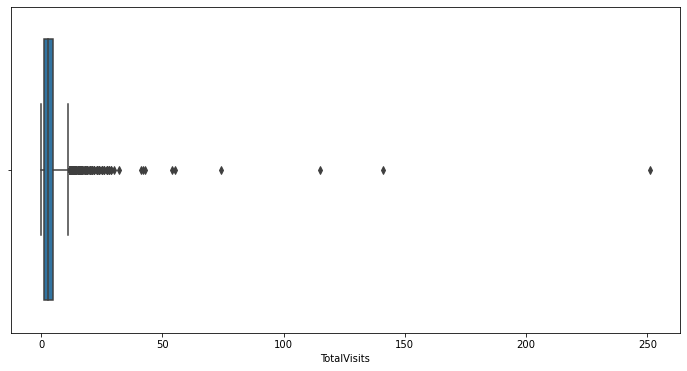

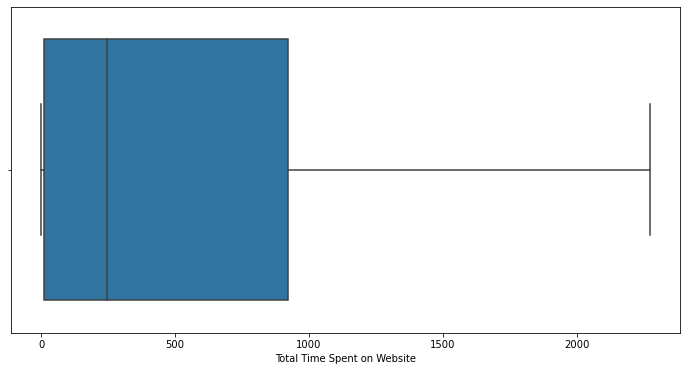

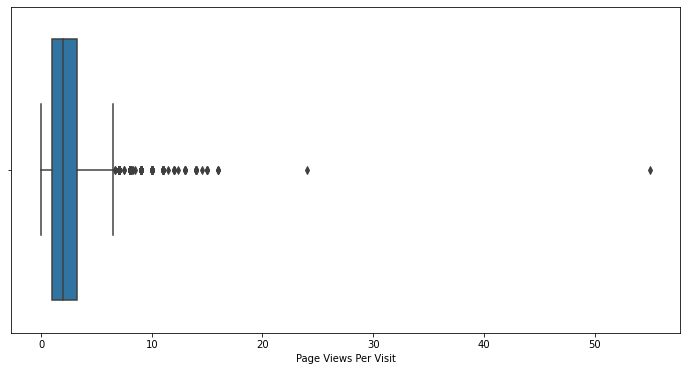

In [29]:
# checking for Outliers in all numeric columns
plt.figure(figsize=[12,6])
sns.boxplot(ls2['TotalVisits'])

plt.figure(figsize=[12,6])
sns.boxplot(ls2['Total Time Spent on Website'])

plt.figure(figsize=[12,6])
sns.boxplot(ls2['Page Views Per Visit'])
plt.show()

**`Inferences:`**
- As we can see from above boxplot, there are few outliers present in ['TotalVisits'] and ['Page Views Per Visit'] so lets cap these columns at 99 percentile

In [30]:
# capping at 99 percentile
ls2['TotalVisits'].loc[ls2['TotalVisits'] > ls2['TotalVisits'].quantile(0.99)] = ls2['TotalVisits'].quantile(0.99)
ls2['Page Views Per Visit'].loc[ls2['Page Views Per Visit'] > 
                            ls2['Page Views Per Visit'].quantile(0.99)] = ls2['Page Views Per Visit'].quantile(0.99)

In [31]:
# Rechecking for outliers in the continuous variables
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
ls2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.343178,482.887481,2.341241
std,3.252302,545.256560,1.984635
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


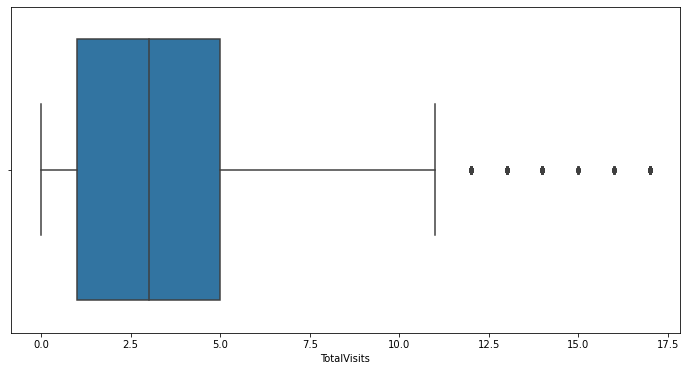

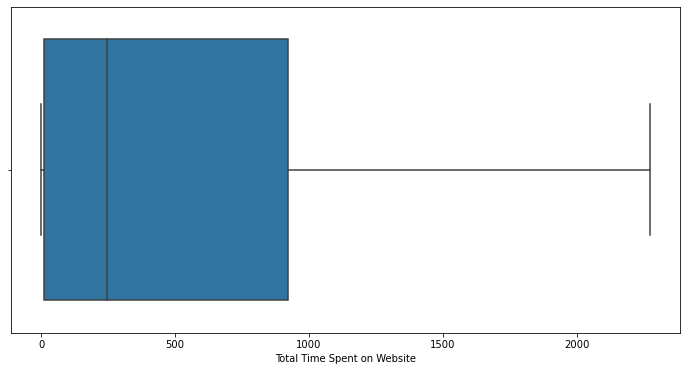

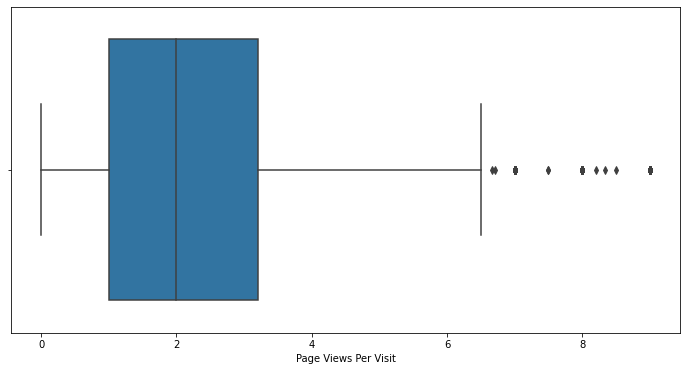

In [32]:
# Rechecking for Outliers in numeric column
plt.figure(figsize=[12,6])
sns.boxplot(ls2['TotalVisits'])

plt.figure(figsize=[12,6])
sns.boxplot(ls2['Total Time Spent on Website'])

plt.figure(figsize=[12,6])
sns.boxplot(ls2['Page Views Per Visit'])
plt.show()

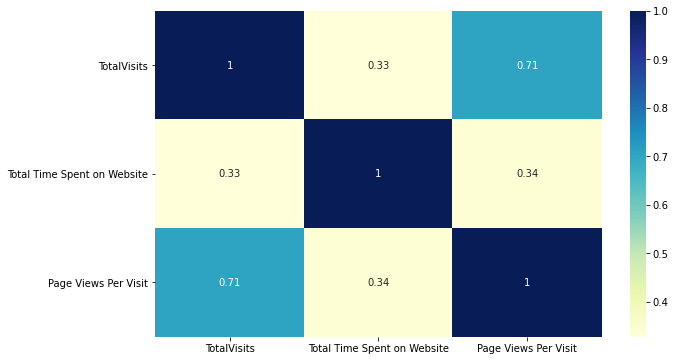

In [33]:
# Checking Correlation between relevant numeric variables using Heatmap
plt.figure(figsize=[10,6])
sns.heatmap(ls2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

**`Inferences:`**
- As we can see there is no significant correlation between the numeric variables

### 2.6 Checking Imbalance in Data

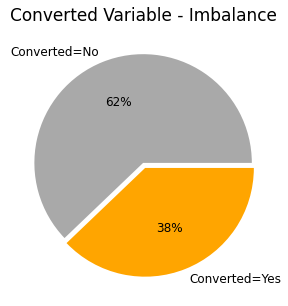

In [34]:
# Checking Imbalance in 'Converted' variable using Pie chart
plt.figure(figsize=(17,5))
plt.pie(ls2['Converted'].value_counts(normalize=True)*100,labels=['Converted=No','Converted=Yes'],explode=(0,0.05),colors=('Darkgray','Orange'),autopct='%1.f%%',
       textprops={'fontsize':12,'color':'black'})
plt.title('Converted Variable - Imbalance',fontdict={'fontsize':17, 'fontweight':5, 'color':'Black'})
plt.show()

In [35]:
### Checking the Conversion Rate in dataset
conv_rate = (sum(ls2['Converted'])/len(ls2['Converted'].index))*100
conv_rate

37.85541106458012

**`Inferences:`**
- As we can see there is no significant imbalance in TARGET variable, hence it is good for further analysis.

## Step 3: Visualising the Data

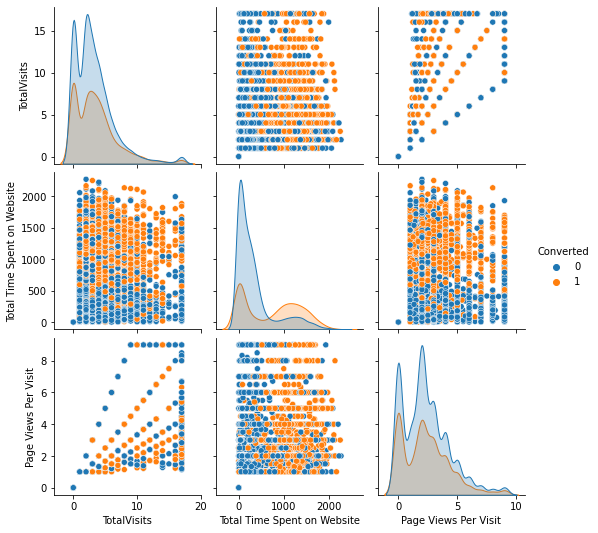

In [36]:
# plotting pairplot to see if there is any relationship among numeric variables for Target variable 
sns.pairplot(ls2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']],diag_kind='kde',hue='Converted')
plt.show()

**`Inferences:`**
- As we can see that Total visits and Total Time Spent on Website is higher for the leads who got converted into paying customers.

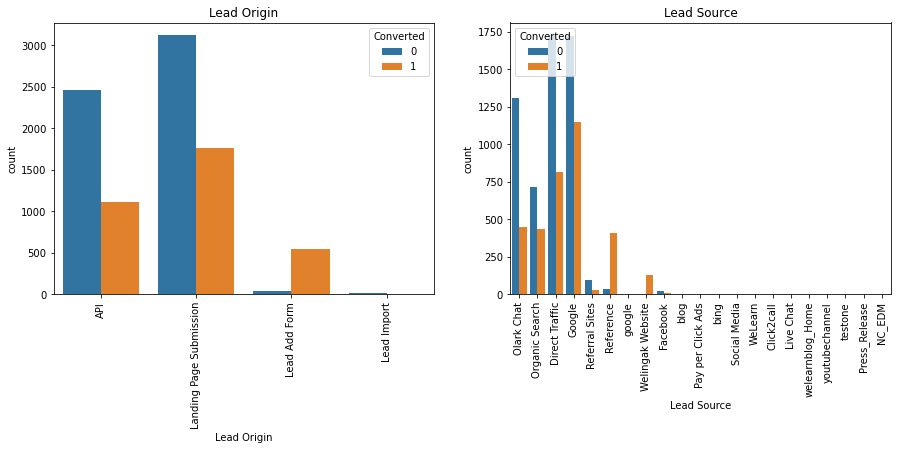

In [37]:
# Plotting counplot for 'Lead Origin' and 'Lead Source' for Target variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= ls2).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= ls2).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

**`Inferences:`**
- As we can see that Lead origin (Lead Add Form) has higher conversion rate compared to other origins.
- Similarly Lead Source (Reference) has higher conversion rate compared to other sources.

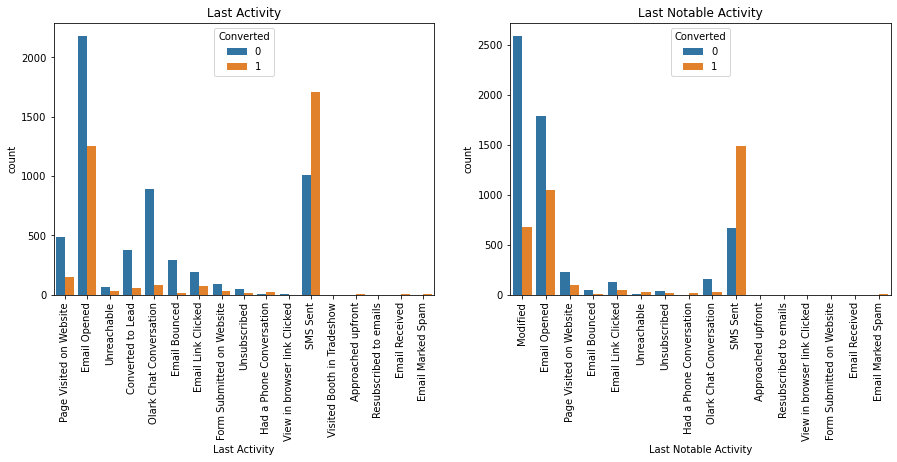

In [38]:
# Plotting counplot for 'Last Activity' and 'Last Notable Activity' for Target variable
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= ls2).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= ls2).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

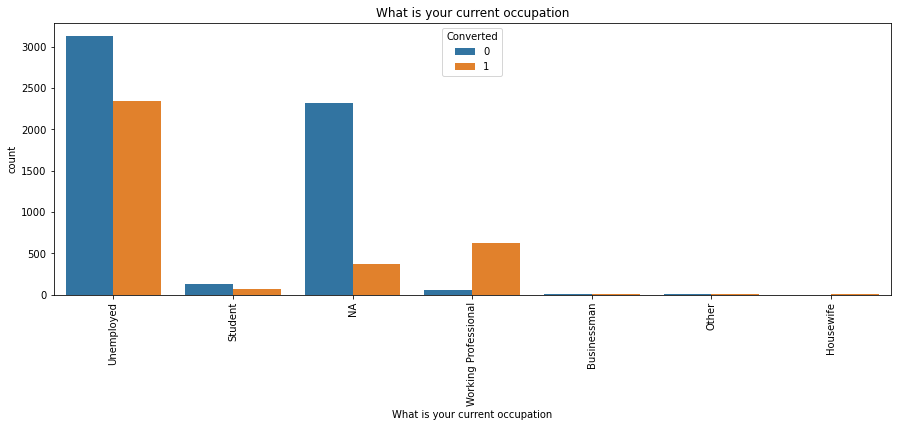

In [39]:
# Plotting countplot for 'What is your current occupation'
plt.figure(figsize = (15,5))

sns.countplot(x='What is your current occupation', hue='Converted', data= ls2).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

**`Inferences:`**
- As we can see that Working Professionals have higher conversion rate compared to other professions.

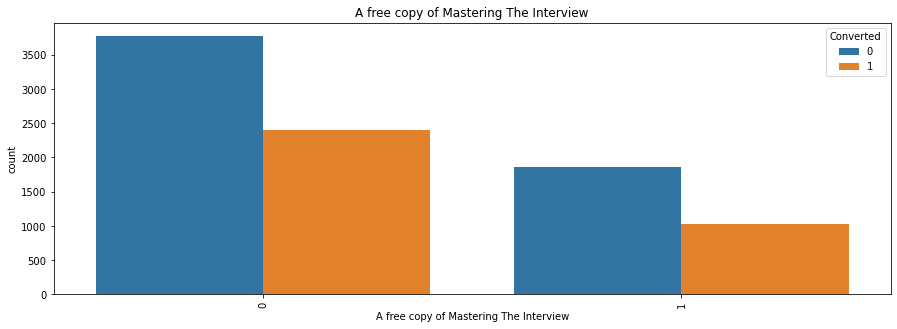

In [40]:
# Plotting countplot for 'A free copy of Mastering The Interview'
plt.figure(figsize = (15,5))

sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= ls2).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

### Dummy Variables

In [41]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(ls2[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
ls2 = pd.concat([ls2, dummy1], axis=1)

In [42]:
ls2.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,...,0,0,1,0,0,0,0,0,0,0


In [43]:
# We have created dummies for the below variables, so we can drop them
ls2 = ls2.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity'], 1)

In [44]:
ls2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   A free copy of Mastering The Interview                9074 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 7   Lead Origin_Lead Import                               9074 non-null   uint8  
 8   Lead Source_Direct Traffic                            9074

## Step 4: Test-Train split and Scaling

### 4.1 Train-Test split

In [45]:
# split the dataset into 70 (train):30 (test) 
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
ls_train, ls_test = train_test_split(ls2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
#verify the split in train dataset
ls_train.shape

(6351, 65)

In [47]:
#verify the split in test dataset
ls_test.shape

(2723, 65)

### 4.2 Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [48]:
#import the required library for feature scaling
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

# Apply scaler() to all the relevant columns
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

ls_train[num_vars] = scaler.fit_transform(ls_train[num_vars])

In [50]:
# Now let's see the head of our dataframe.
ls_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0.117647,0.178347,0.222222,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,0,0.117647,0.085355,0.222222,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,1,0.117647,0.619946,0.222222,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,1,0.294118,0.711590,0.277778,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
# Now let's see the summary of our dataframe.
ls_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.385136,0.197171,0.217585,0.261393,0.315383,0.535979,0.068651,0.003779,0.278066,0.003936,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.486666,0.190612,0.244868,0.220952,0.464705,0.498743,0.252879,0.061362,0.448082,0.062622,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.058824,0.004492,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.176471,0.110961,0.222222,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.294118,0.413522,0.370000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# Dividing into X and Y sets for the model building (y will have Target variable 'cnt' while X will have rest of the predicter variables)
y_train = ls_train.pop('Converted')
X_train = ls_train

y_test = ls_test.pop('Converted')
X_test = ls_test

## Step 5: Model Building

### 5.1 Model Building using statsmodel for the detailed statistics

In [53]:
import statsmodels.api as sm

In [54]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6289
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2504.0
Date:                Tue, 12 Oct 2021   Deviance:                       5008.0
Time:                        16:37:28   Pearson chi2:                 6.17e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.9455   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              1.5789      0.271      5.835      0.000       1.048       2.109
Total Time Spent on Website                              4.6491      0.171     27.210      0.000       4.314       4.984
Page Views Per Visit                                    -1.0802      0.262     -4.117      0.000      -1.594      -0.566
A free copy of Mastering The Interview                  -0.0514      0.109     -0.473      0.637      -0.265       0.162
Lead Origin_Landing Page Submission                     -0.2121      0.109     -1.947      0.052      -0.426       0.001
Lead Origin_Lead Add Form                               -0.6148      1.679     -0.366      0.714      -3.905       2.675
Lead Origin_Lead Import                                 24.8346   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -3.1051      2.112     -1.470      0.141      -7.244       1.034
Lead Source_Facebook                                   -26.5909   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -2.7399      2.110     -1.298      0.194      -6.876       1.396
Lead Source_Live Chat                                   21.8160   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      21.5075   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                  -1.6731      2.104     -0.795      0.426      -5.796       2.450
Lead Source_Organic Search                              -3.0656      2.113     -1.451      0.147      -7.207       1.076
Lead Source_Pay per Click Ads                          -24.6317   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -24.9676   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.1582      1.290      0.898      0.369      -1.371       3.687
Lead Source_Referral Sites                              -3.1366      2.137     -1.468      0.142      -7.325       1.052
Lead Source_Social Media                                -0.7917      2.578     -0.307      0.759      -5.844       4.261
Lead Source_WeLearn                                  -3.145e-09   1.06e-05     -0.000      1.000   -2.08e-05    2.08e-05
Lead Source_Welingak Website                             3.0578      1.462      2.092      0.036       0.193       5.923
Lead Source_bing                                        -2

### 5.2 Feature Selection Using RFE

In [55]:
# Importing RFE and LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [56]:
# Running RFE with the output number of the variable equal to 15
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [57]:
# checking the rank of variables, we need top 15 variables)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Pay per Click Ads', False, 33),
 ('Lead Source_Press_Release', False, 25),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_WeLearn', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_blog', False, 37),
 ('Lead Source_google', False, 18),
 ('Lead Source_testone', False

In [58]:
# Checking Top 15 variables as per the RFE
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_NA',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [59]:
# Checking other insignificant variables as per the RFE
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'L

#### Model 1:

In [60]:
# Lets build our first Logistic Regression Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.3
Date:                Tue, 12 Oct 2021   Deviance:                       5200.5
Time:                        16:37:40   Pearson chi2:                 6.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2986      0.097    -23.642      0.000      -2.489      -2.108
TotalVisits                                              0.6692      0.213      3.144      0.002       0.252       1.086
Total Time Spent on Website                              4.6151      0.166     27.831      0.000       4.290       4.940
Lead Origin_Lead Add Form                                3.7227      0.227     16.393      0.000       3.278       4.168
Lead Source_Olark Chat                                   1.6193      0.119     13.608      0.000       1.386       1.852
Lead Source_Welingak Website                             1.9914      0.756      2.634      0.008       0.510       3.473
Last Activity_Converted to Lead                         -1.1611      0.227     -5.119      0.000      -1.606      -0.717
Last Activity_Email Bounced                             -2.1445      0.373     -5.743      0.000      -2.876      -1.413
Last Activity_Had a Phone Conversation                   1.0133      1.057      0.959      0.338      -1.058       3.085
Last Activity_Olark Chat Conversation                   -1.3460      0.164     -8.186      0.000      -1.668      -1.024
Last Activity_SMS Sent                                   1.1715      0.075     15.574      0.000       1.024       1.319
What is your current occupation_Housewife               22.7719   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_NA                      -1.2955      0.088    -14.765      0.000      -1.468      -1.124
What is your current occupation_Working Professional     2.4886      0.187     13.306      0.000       2.122       2.855
Last Notable Activity_Had a Phone Conversation           2.5664      1.542      1.665      0.096      -0.455       5.588
Last Notable Activity_Unreachable                        2.0075      0.485      4.137      0.000       1.056       2.959
========================================================================================================================
"""

In [61]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
7              Last Activity_Had a Phone Conversation  3.41
13     Last Notable Activity_Had a Phone Conversation  3.40
1                         Total Time Spent on Website  1.93
0                                         TotalVisits  1.90
3                              Lead Source_Olark Chat  1.54
2                           Lead Origin_Lead Add Form  1.51
9                              Last Activity_SMS Sent  1.50
11                 What is your current occupation_NA  1.45
8               Last Activity_Olark Chat Conversation  1.42
4                        Lead Source_Welingak Website  1.33
12  What is your current occupation_Working Profes...  1.20
5                     Last Activity_Converted to Lead  1.04
6                         Last Activity_Email Bounced  1.04
10          What is your current occupation_Housewife  1.01
14                  Last Notable Activity_Unreachable  1.01


**`Inferences:`**
- As we can see that VIF for all the variables is in permissible limit. However few variables have higher higher probabilities, hence needs to be removed from the model.
- Lets first drop 'What is your current occupation_Housewife' from the model.

#### Model 2:

In [64]:
#drop 'What is your current occupation_Housewife' from the model
X = X.drop(['What is your current occupation_Housewife'], axis=1)

In [65]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.7
Date:                Tue, 12 Oct 2021   Deviance:                       5209.4
Time:                        16:37:41   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2891      0.097    -23.589      0.000      -2.479      -2.099
TotalVisits                                              0.6603      0.213      3.104      0.002       0.243       1.077
Total Time Spent on Website                              4.6134      0.166     27.851      0.000       4.289       4.938
Lead Origin_Lead Add Form                                3.7394      0.227     16.490      0.000       3.295       4.184
Lead Source_Olark Chat                                   1.6134      0.119     13.572      0.000       1.380       1.846
Lead Source_Welingak Website                             1.9678      0.756      2.603      0.009       0.486       3.449
Last Activity_Converted to Lead                         -1.1680      0.227     -5.150      0.000      -1.612      -0.723
Last Activity_Email Bounced                             -2.1499      0.373     -5.759      0.000      -2.882      -1.418
Last Activity_Had a Phone Conversation                   1.0071      1.056      0.953      0.340      -1.064       3.078
Last Activity_Olark Chat Conversation                   -1.3497      0.164     -8.209      0.000      -1.672      -1.027
Last Activity_SMS Sent                                   1.1655      0.075     15.506      0.000       1.018       1.313
What is your current occupation_NA                      -1.2984      0.088    -14.803      0.000      -1.470      -1.126
What is your current occupation_Working Professional     2.4835      0.187     13.280      0.000       2.117       2.850
Last Notable Activity_Had a Phone Conversation           2.5670      1.542      1.665      0.096      -0.455       5.589
Last Notable Activity_Unreachable                        2.0025      0.485      4.126      0.000       1.051       2.954
========================================================================================================================
"""

In [66]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
7              Last Activity_Had a Phone Conversation  3.41
12     Last Notable Activity_Had a Phone Conversation  3.40
1                         Total Time Spent on Website  1.93
0                                         TotalVisits  1.89
3                              Lead Source_Olark Chat  1.54
2                           Lead Origin_Lead Add Form  1.50
9                              Last Activity_SMS Sent  1.50
10                 What is your current occupation_NA  1.45
8               Last Activity_Olark Chat Conversation  1.42
4                        Lead Source_Welingak Website  1.33
11  What is your current occupation_Working Profes...  1.20
5                     Last Activity_Converted to Lead  1.04
6                         Last Activity_Email Bounced  1.04
13                  Last Notable Activity_Unreachable  1.01


**`Inferences:`**
- Lets now drop 'Last Activity_Had a Phone Conversation' from the model.

#### Model 3:

In [67]:
#drop 'Last Activity_Had a Phone Conversation' from the model
X = X.drop(['Last Activity_Had a Phone Conversation'], axis=1)

In [68]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Tue, 12 Oct 2021   Deviance:                       5210.3
Time:                        16:37:41   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2870      0.097    -23.574      0.000      -2.477      -2.097
TotalVisits                                              0.6617      0.213      3.111      0.002       0.245       1.079
Total Time Spent on Website                              4.6139      0.166     27.860      0.000       4.289       4.939
Lead Origin_Lead Add Form                                3.7380      0.227     16.485      0.000       3.294       4.182
Lead Source_Olark Chat                                   1.6126      0.119     13.565      0.000       1.380       1.846
Lead Source_Welingak Website                             1.9680      0.756      2.604      0.009       0.486       3.449
Last Activity_Converted to Lead                         -1.1700      0.227     -5.160      0.000      -1.614      -0.726
Last Activity_Email Bounced                             -2.1518      0.373     -5.764      0.000      -2.883      -1.420
Last Activity_Olark Chat Conversation                   -1.3511      0.164     -8.218      0.000      -1.673      -1.029
Last Activity_SMS Sent                                   1.1635      0.075     15.486      0.000       1.016       1.311
What is your current occupation_NA                      -1.2998      0.088    -14.821      0.000      -1.472      -1.128
What is your current occupation_Working Professional     2.4819      0.187     13.272      0.000       2.115       2.848
Last Notable Activity_Had a Phone Conversation           3.5719      1.125      3.174      0.002       1.367       5.777
Last Notable Activity_Unreachable                        2.0008      0.485      4.122      0.000       1.049       2.952
========================================================================================================================
"""

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
1                         Total Time Spent on Website  1.93
0                                         TotalVisits  1.89
3                              Lead Source_Olark Chat  1.54
2                           Lead Origin_Lead Add Form  1.50
8                              Last Activity_SMS Sent  1.50
9                  What is your current occupation_NA  1.45
7               Last Activity_Olark Chat Conversation  1.42
4                        Lead Source_Welingak Website  1.33
10  What is your current occupation_Working Profes...  1.20
5                     Last Activity_Converted to Lead  1.04
6                         Last Activity_Email Bounced  1.04
12                  Last Notable Activity_Unreachable  1.01
11     Last Notable Activity_Had a Phone Conversation  1.00


**`Inferences:`**
- As we can see that probabilities and VIF for all the variables is in permissible limit. Hence we can use this model for evaluation

## Step 6: Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [70]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.063800
1012    0.184639
9226    0.619884
4750    0.625962
7987    0.913275
1281    0.744926
2880    0.030421
4971    0.909178
7536    0.881577
1248    0.886673
dtype: float64

In [71]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06380002, 0.18463935, 0.61988396, 0.62596181, 0.91327535,
       0.74492616, 0.0304208 , 0.90917809, 0.88157708, 0.88667261])

In [72]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.063800
1,0,0.184639
2,0,0.619884
3,1,0.625962
4,1,0.913275


In [73]:
# Substituting 0 or 1 with the cut off as 50%
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.063800,0
1,0,0.184639,0
2,0,0.619884,1
3,1,0.625962,1
4,1,0.913275,1


In [74]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [75]:
# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion1

array([[3456,  449],
       [ 740, 1706]], dtype=int64)

#### Accuracy

In [76]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted).round(2)

0.81

In [77]:
# Substituting the value of true positive
TP = confusion1[1,1]
# Substituting the value of true negatives
TN = confusion1[0,0]
# Substituting the value of false positives
FP = confusion1[0,1] 
# Substituting the value of false negatives
FN = confusion1[1,0]

#### Sensitivity and Specificity

In [78]:
# Calculating the sensitivity
round(TP/(TP+FN),3)

0.697

In [79]:
# Calculating the specificity
round(TN/(TN+FP),2)

0.89

### Optimal Cutoff using ROC curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [80]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

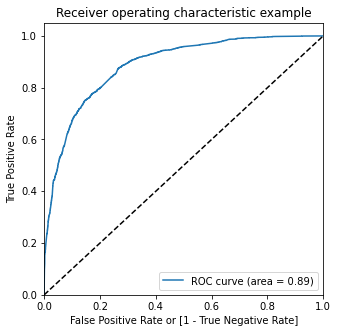

In [82]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [83]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.063800,0,1,0,0,0,0,0,0,0,0,0
1,0,0.184639,0,1,1,0,0,0,0,0,0,0,0
2,0,0.619884,1,1,1,1,1,1,1,1,0,0,0
3,1,0.625962,1,1,1,1,1,1,1,1,0,0,0
4,1,0.913275,1,1,1,1,1,1,1,1,1,1,1


In [84]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.594080,0.982829,0.350576
0.2,0.2,0.757361,0.918643,0.656338
0.3,0.3,0.787750,0.874080,0.733675
0.4,0.4,0.809006,0.761652,0.838668
0.5,0.5,0.812785,0.697465,0.885019
0.6,0.6,0.805700,0.635732,0.912164
0.7,0.7,0.782869,0.522895,0.945711
0.8,0.8,0.759723,0.426410,0.968502
0.9,0.9,0.709337,0.266558,0.986684


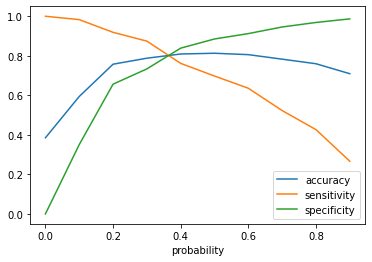

In [85]:
# Plotting it
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [86]:
# Substituting 0 or 1 with the cut off as 0.38 based on the ROC curve
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.063800,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.184639,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.619884,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.625962,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.913275,1,1,1,1,1,1,1,1,1,1,1,1


#### Accuracy (using ROC curve)

In [87]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted).round(2)

0.81

In [88]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3228,  677],
       [ 544, 1902]], dtype=int64)

In [89]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

#### Sensitivity and Specificity (using ROC curve)

In [90]:
# Calculating the sensitivity
round(TP/(TP+FN),2)

0.78

In [91]:
# Calculating the specificity
round(TN/(TN+FP),2)

0.83

### Precesion and Recall

In [92]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion2

array([[3456,  449],
       [ 740, 1706]], dtype=int64)

In [93]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [94]:
# Precesion
round(TP/(TP+FP),2)

0.79

In [95]:
#Recall
round(TP/(TP+FN),2)

0.7

#### Precision and Recall tradeoff

In [96]:
# import required library
from sklearn.metrics import precision_recall_curve

In [97]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

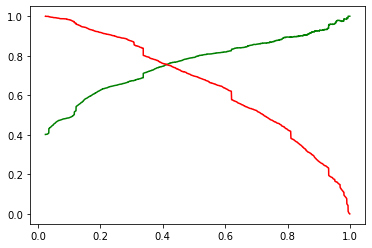

In [98]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [99]:
# Substituting 0 or 1 with the cut off as 0.42 based on the Precision and Recall tradeoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.063800,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.184639,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.619884,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.625962,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.913275,1,1,1,1,1,1,1,1,1,1,1,1


In [100]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted).round(2)

0.81

In [101]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3327,  578],
       [ 607, 1839]], dtype=int64)

In [102]:
# Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Calculate Precision
round(TP/(TP+FP),2)

0.76

In [104]:
# Calculate Recall
round(TP/(TP+FN),2)

0.75

## Step 7: Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [105]:
# Feature scaling on Test dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [106]:
X_test = X_test[X.columns]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_NA,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3271,0.235294,0.070530,0,0,0,0,0,0,0,1,0,0,0
1490,0.294118,0.679695,0,0,0,0,0,0,0,0,1,0,0
7936,0.117647,0.033243,0,0,0,0,0,0,0,1,0,0,0
4216,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0
3830,0.470588,0.073675,0,0,0,0,0,0,0,1,0,0,0


In [107]:
# Add constant
X_test_sm = sm.add_constant(X_test)

In [108]:
# Run the prediction
y_test_pred = res.predict(X_test_sm)

In [109]:
# Check top 10 rows
y_test_pred[:10]

3271    0.042874
1490    0.971406
7936    0.033713
4216    0.810140
3830    0.050428
1800    0.642439
6507    0.323139
4821    0.310969
4223    0.931784
4714    0.307742
dtype: float64

In [110]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [111]:
# Let's see the head
y_pred_1.head()

,0
3271,0.042874
1490,0.971406
7936,0.033713
4216,0.810140
3830,0.050428


In [112]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [113]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [114]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
0,0,0.042874
1,1,0.971406
2,0,0.033713
3,1,0.810140
4,0,0.050428


In [116]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [117]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.042874
1,1,0.971406
2,0,0.033713
3,1,0.810140
4,0,0.050428


In [118]:
# Make predictions on the test set using 0.38 as the cutoff based on the Train dataset
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [119]:
# Check y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.042874,0
1,1,0.971406,1
2,0,0.033713,0
3,1,0.810140,1
4,0,0.050428,0


In [120]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted).round(2)

0.81

In [121]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1449,  285],
       [ 229,  760]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Calculate sensitivity
round(TP / float(TP+FN),2)

0.77

In [124]:
# Calculate specificity
round(TN / float(TN+FP),2)

0.84

# Business Outcome (Based On Model-3)

#### Final Observation:
Let us compare the values obtained for Train & Test: <br>

Train Data: <br>
Accuracy : 81% <br>
Sensitivity : 78% <br>
Specificity : 83% <br>

Test Data: <br>
Accuracy : 81% <br>
Sensitivity : 77% <br>
Specificity : 84% <br>

#### Conclusion:
Below are the variables directly impacting the potential leads that converts to paying customers:
1. 'TotalVisits' and 'Total Time Spent on Website' contribute most towards the probability of a lead getting converted.
2. 'Lead Origin' :- Leads whose origin is 'Lead Add Form' has higher possibility to convert into paying customers.
3. 'Lead Source' :- Leads whose source is either 'Olark Chat' or 'Welingak Website' tend to have higher chances of converting into paying customers.
4. 'What is your current Occupation' :- Leads who havn't mentioned their current occupation are less likely to get converted into paying customers. On the other hand, leads who are working professionals have higher probability of converting into paying customers.

From the above points it is evident that 'X Education' should focus more on leads who spend more time on the website
and visits the website quite often. Also the leads whose origin is 'Lead Add Form', Lead source is either 'Olark Chat' or 'Welingak Website' and they are working professionals.